# DESCRIPTION:
<center><span style="color:orange">
Visualizations, Technical indicators, Statistics and every available quantitative method in face to infer from data.
</span>

Import libraries and instantiate objects.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from polaristools.polarisbot import PolarisBot

In [2]:
from datetime import datetime, timedelta
import numpy as np

In [3]:
polaris = PolarisBot()

# Open dataframes.

In [4]:
df_1d = polaris.dataframeFromBinary(filename='df_klines_BTCUSDT_1d')

In [5]:
# df_btc_1d = polaris.dataframeFromBinary(filename='df_klines_BTCUSDT_1d')
# df_eth_1d = polaris.dataframeFromBinary(filename='df_klines_ETHUSDT_1d')
# df_doge_1d = polaris.dataframeFromBinary(filename='df_klines_DOGEUSDT_1d')
# df_bnb_1d = polaris.dataframeFromBinary(filename='df_klines_BNBUSDT_1d')

# Add Indicators, ta-lib.

In [6]:
df_1d = polaris.addIndicators(
    df_1d,
    {
        'talib_EMA':[
            {'period':40},
            {'period':70},
            {'period':100},
        ],
        
        'simple_returns':{'lookback':1},
        
        'log_returns':{'lookback':1},
        
        'talib_ATR':{'timeperiod':14},
        
        'talib_RSI':{'timeperiod':14},
        
        'talib_ADX':{'timeperiod':14},
        
        'talib_MACD':{
            'fastperiod':12,
            'slowperiod':26,
            'signalperiod':9,
        },
        
        'talib_SAR':{
            'acceleration':0.02,
            'maximum':0.2,
        },
        
        'talib_BBANDS':{
            'timeperiod':7,
            'nbdevup':2,
            'nbdevdn':2,
            'matype':0,
        },
        
        'talib_STOCHRSI':{
            'timeperiod':14,
            'fastk_period':5,
            'fastd_period':3,
            'fastd_matype':0,
        },
        
        'talib_AROON':{'timeperiod':14},
        
        'talib_OBV':True,
        
        'talib_doji':True,
        
    }
)

df_1d.columns

Index(['open', 'high', 'low', 'close', 'volume', 'talib_EMA_40',
       'talib_EMA_70', 'talib_EMA_100', 'simple_returns', 'log_returns',
       'talib_ATR', 'talib_RSI', 'talib_ADX', 'talib_MACD',
       'talib_MACD_signal', 'talib_MACD_hist', 'talib_SAR', 'BB_up', 'BB_mid',
       'BB_low', 'talib_STOCHRSI_k', 'talib_STOCHRSI_d', 'talib_AROON_down',
       'talib_AROON_up', 'talib_OBV', 'talib_doji'],
      dtype='object')

# Sample from dataframes.

In [7]:
start = '2021-08-01'
end = '2022-08-09'

sample_1d = df_1d.loc[start:end].copy()

# Correlation (A,B)

In [9]:
A = sample_1d.close
B = sample_1d.talib_OBV

print(f"""
Pearson's r     : {A.corr(B)}
Kendall's tau   : {A.corr(B, method='kendall')}
Spearman's rho  : {A.corr(B, method='spearman')}
""")


Pearson's r     : 0.814326101247589
Kendall's tau   : 0.7120901492451719
Spearman's rho  : 0.8867246060988373



# Periodical Correlation

In [10]:
def perdiodical_correlation(df, min_date, max_date, delta):
    date_a = min_date
    corr_arr = []
    start_date = []
    while date_a < max_date:
        date_b = datetime.strftime(datetime.strptime(date_a, "%Y-%m-%d")+delta, "%Y-%m-%d")
        
        corr = df.loc[date_a:date_b].corr()
        value = corr['close'].iloc[1]
        labels = list(df.columns)
        # print(f'Correlation({labels}), period({date_a} : {date_b}) = {value:.2f}')
        corr_arr.append(value)
        start_date.append(date_b)
        date_a = date_b
    return corr_arr,start_date 

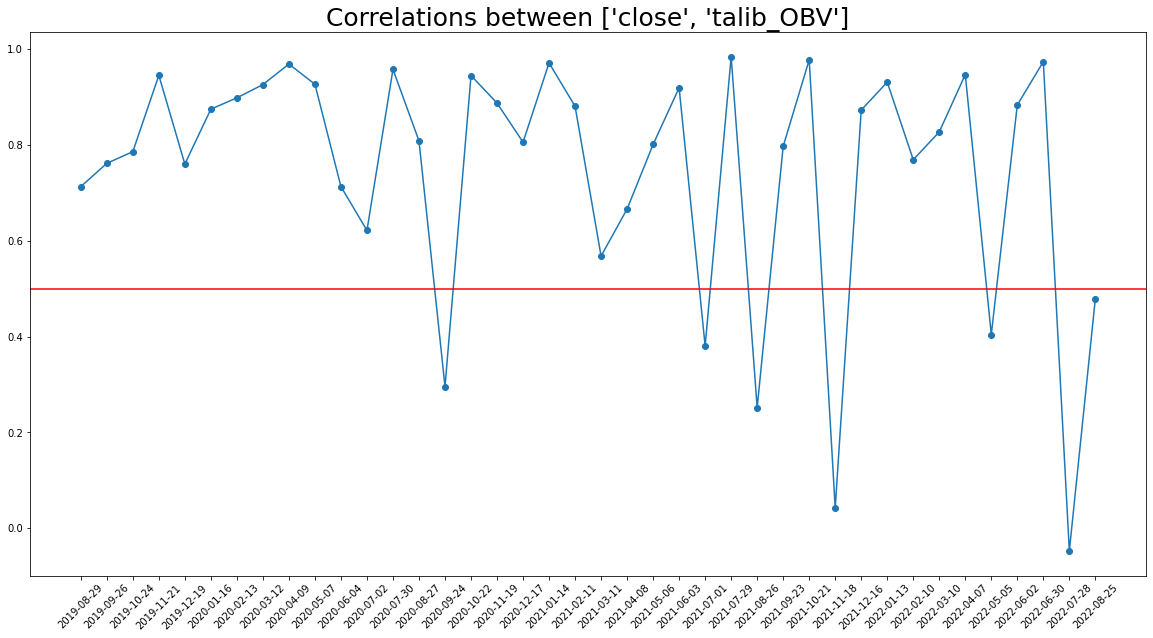

In [11]:
data = df_1d[['close', 'talib_OBV']]

corr_arr, dates = perdiodical_correlation(
                                            df = data,
                                            min_date = "2019-08-01",
                                            max_date = "2022-08-01",
                                            delta = timedelta(weeks=4),
                                            )

title =  list(data.columns)

X = dates
Y = corr_arr

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X, Y, marker='o')
ax.set_title(f'Correlations between {title}', size=25)
ax.axhline(y=0.5, color='red')

plt.xticks(X, rotation=45)

plt.show()                                        

# Correlation Matrix

In [12]:
df_corr_matrix = sample_1d[
    [
    # 'open',
    # 'high',
    # 'low',
    'close',
    
    'talib_ATR',
    'talib_OBV',
    
    'volume',
    'log_returns',
    'talib_STOCHRSI_k',
    'talib_STOCHRSI_d',
    'talib_RSI',
    'talib_ADX',
    'talib_MACD',
    'talib_MACD_signal', 
    'talib_MACD_hist',
    ]
].copy()

In [13]:
corrMatrix = df_corr_matrix.corr()

In [14]:
corrMatrix

,close,talib_ATR,talib_OBV,volume,log_returns,talib_STOCHRSI_k,talib_STOCHRSI_d,talib_RSI,talib_ADX,talib_MACD,talib_MACD_signal,talib_MACD_hist
close,1.000000,0.818070,0.814326,-0.578567,0.095727,0.046183,0.049898,0.473556,-0.060063,0.538862,0.581430,-0.053350
talib_ATR,0.818070,1.000000,0.717349,-0.465120,0.008974,0.010884,0.000293,0.120730,0.177148,0.177474,0.253094,-0.229967
talib_OBV,0.814326,0.717349,1.000000,-0.698069,0.049969,0.048414,0.051189,0.246646,0.040066,0.307197,0.350182,-0.094951
volume,-0.578567,-0.465120,-0.698069,1.000000,-0.091913,-0.008568,-0.023533,-0.097443,-0.060807,-0.107890,-0.124128,0.037285
log_returns,0.095727,0.008974,0.049969,-0.091913,1.000000,0.635490,0.248730,0.345209,0.041361,0.079617,0.033544,0.172664
talib_STOCHRSI_k,0.046183,0.010884,0.048414,-0.008568,0.635490,1.000000,0.731334,0.286278,0.080854,-0.060554,-0.131299,0.233429
talib_STOCHRSI_d,0.049898,0.000293,0.051189,-0.023533,0.248730,0.731334,1.000000,0.324221,0.080807,-0.013547,-0.135222,0.417186
talib_RSI,0.473556,0.120730,0.246646,-0.097443,0.345209,0.286278,0.324221,1.000000,-0.214316,0.873359,0.754224,0.562193
talib_ADX,-0.060063,0.177148,0.040066,-0.060807,0.041361,0.080854,0.080807,-0.214316,1.000000,-0.192796,-0.231109,0.098679
talib_MACD,0.538862,0.177474,0.307197,-0.107890,0.079617,-0.060554,-0.013547,0.873359,-0.192796,1.000000,0.961160,0.307293


In [15]:
corrMatrix['close'].sort_values(ascending=False)

close                1.000000
talib_ATR            0.818070
talib_OBV            0.814326
talib_MACD_signal    0.581430
talib_MACD           0.538862
talib_RSI            0.473556
log_returns          0.095727
talib_STOCHRSI_d     0.049898
talib_STOCHRSI_k     0.046183
talib_MACD_hist     -0.053350
talib_ADX           -0.060063
volume              -0.578567
Name: close, dtype: float64

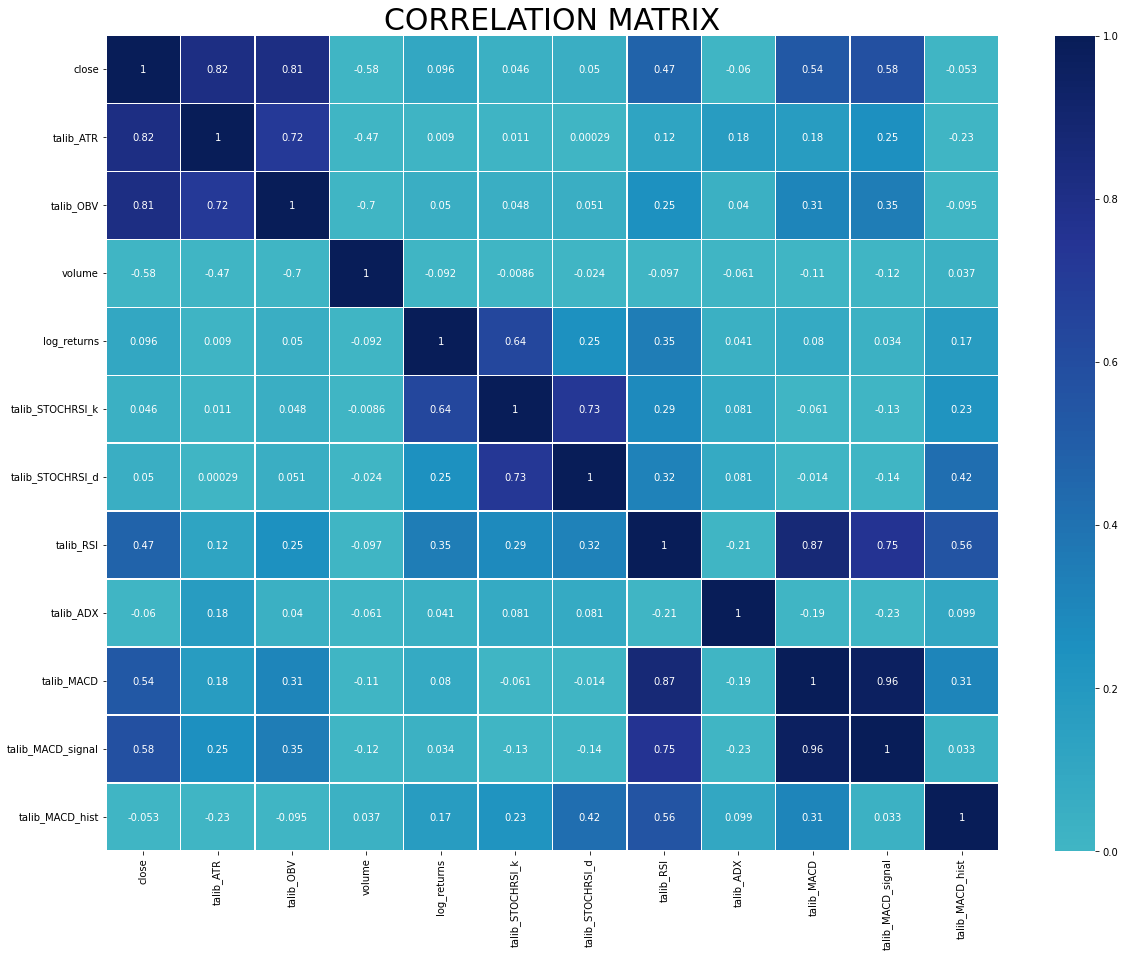

' \n    LOS PRECIOS DE CIERRE EN ESTA MUESTRA \n    DEVUELVEN ALTOS VALORES DE CORRELACIÓN\n    CON LOS INDICADORES: ATR Y OBV\n    '

In [16]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title(label='CORRELATION MATRIX', size=30)

sns.heatmap(
    corrMatrix,
    annot=True,
    cmap="YlGnBu",
    vmin=0,
    vmax=1,
    linewidths=0.5,
    center=0,
    ax=ax,
)
plt.show()

''' 
    LOS PRECIOS DE CIERRE EN ESTA MUESTRA 
    DEVUELVEN ALTOS VALORES DE CORRELACIÓN
    CON LOS INDICADORES: ATR Y OBV
    '''

# Covariance Matrix

In [17]:
df_covMatrix = sample_1d[
    [
    # 'open',
    # 'high',
    # 'low',
    'close',
    
    'talib_ATR',
    'talib_OBV',
    
    'volume',
    'log_returns',
    'talib_STOCHRSI_k',
    'talib_STOCHRSI_d',
    'talib_RSI',
    'talib_ADX',
    'talib_MACD',
    'talib_MACD_signal', 
    'talib_MACD_hist',
    ]
].copy()

'''     
    EL PRECIO DE CIERRE MUESTRA ALTOS VALORES DE COVARIANZA
    CON EL INDICADOR OBV.
    '''

'     \n    EL PRECIO DE CIERRE MUESTRA ALTOS VALORES DE COVARIANZA\n    CON EL INDICADOR OBV.\n    '

In [18]:
covMatrix = pd.DataFrame.cov(df_covMatrix)

In [19]:
covMatrix['close'].sort_values(ascending=False)

talib_OBV            7.092267e+09
close                1.435007e+08
talib_MACD_signal    1.170122e+07
talib_MACD           1.138983e+07
talib_ATR            5.496824e+06
talib_RSI            7.060807e+04
talib_STOCHRSI_k     2.309994e+04
talib_STOCHRSI_d     1.933559e+04
log_returns          4.100295e+01
talib_ADX           -5.808998e+03
talib_MACD_hist     -3.113890e+05
volume              -3.338236e+08
Name: close, dtype: float64

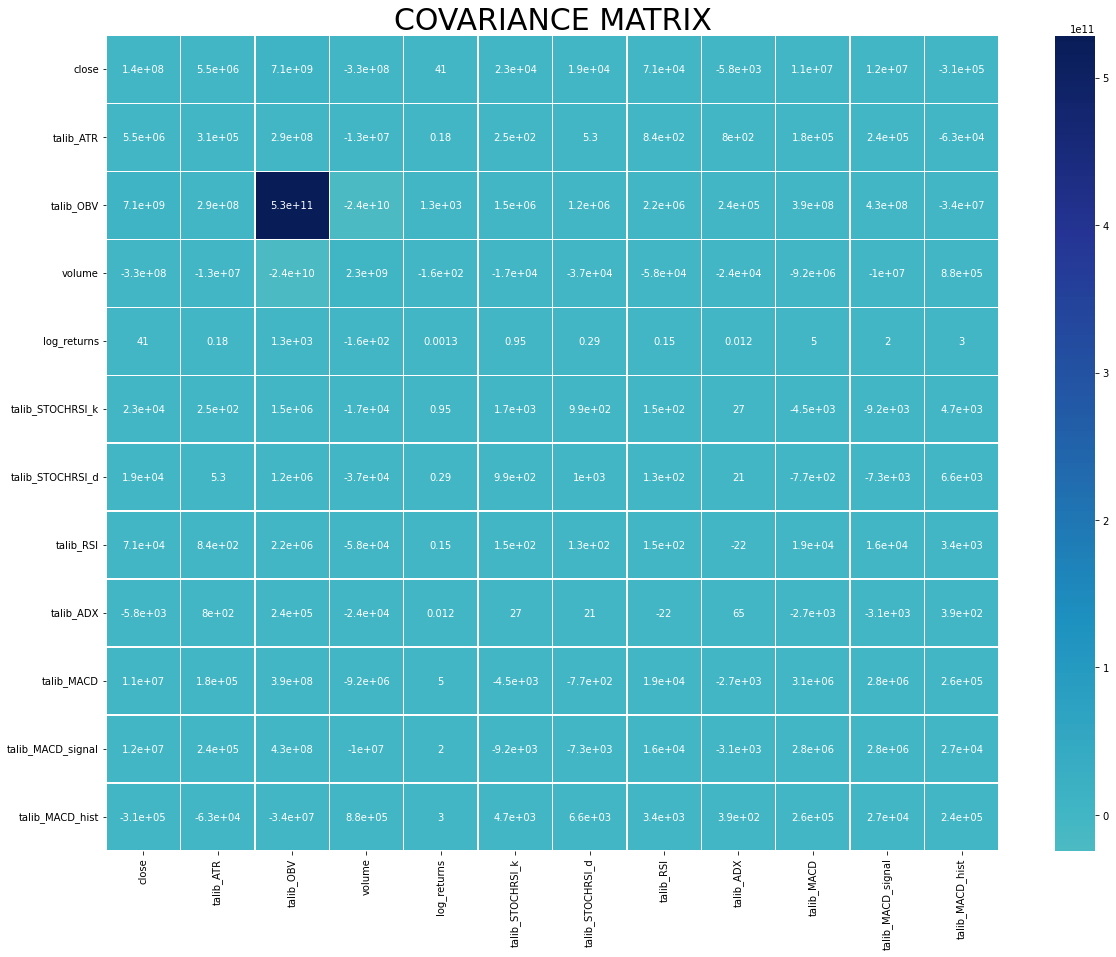

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title(label='COVARIANCE MATRIX', size=30)

sns.heatmap(
    covMatrix,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    center=0,
    ax=ax,
)
plt.show()

# Plot (closeprice vs returns)

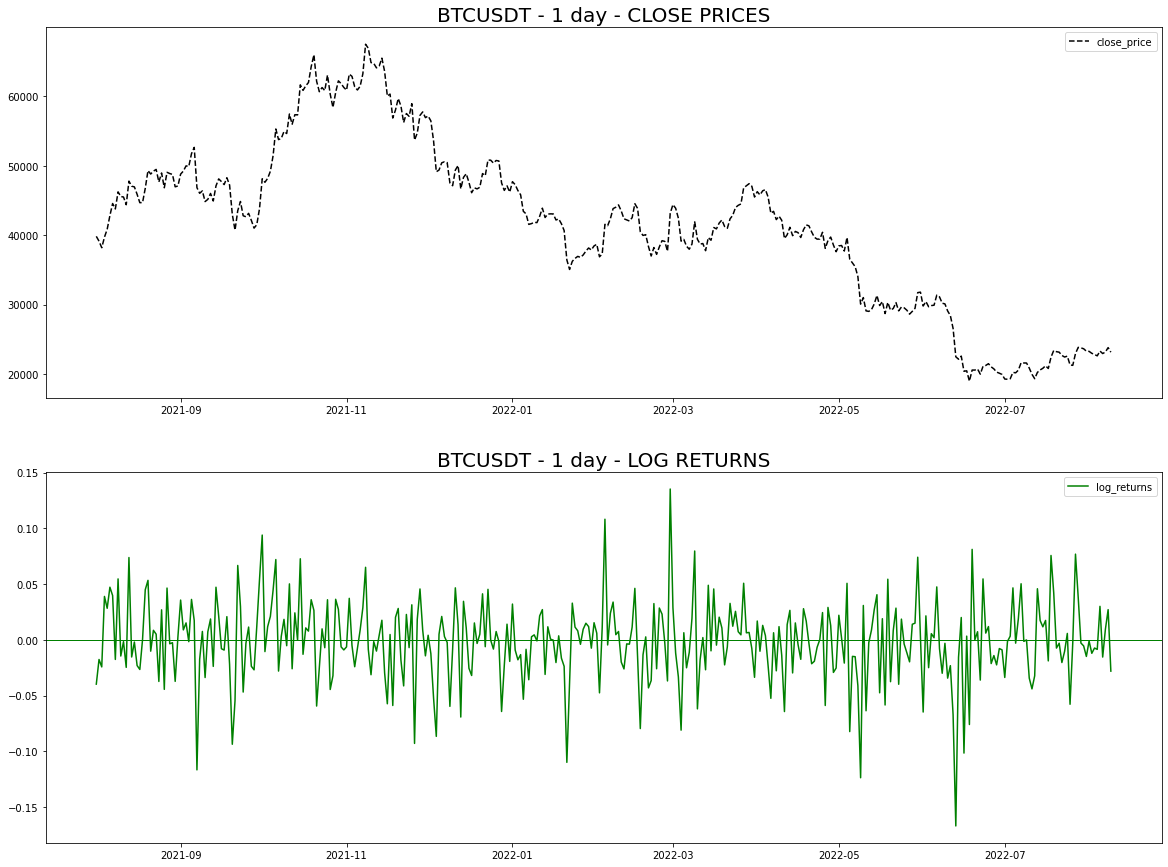

In [21]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(20,15),
)

ax[0].set_title(label='BTCUSDT - 1 day - CLOSE PRICES', size=20)
ax[0].plot(sample_1d['close'], color='black', linestyle='dashed')
ax[0].legend(['close_price'], loc='best')

ax[1].set_title(label='BTCUSDT - 1 day - LOG RETURNS', size=20)
ax[1].plot(sample_1d['log_returns'], color='green')
ax[1].legend(['log_returns'], loc='best')
ax[1].axhline(y=0, color='green', lw=1)

plt.show()

# <center>Probability Distribution

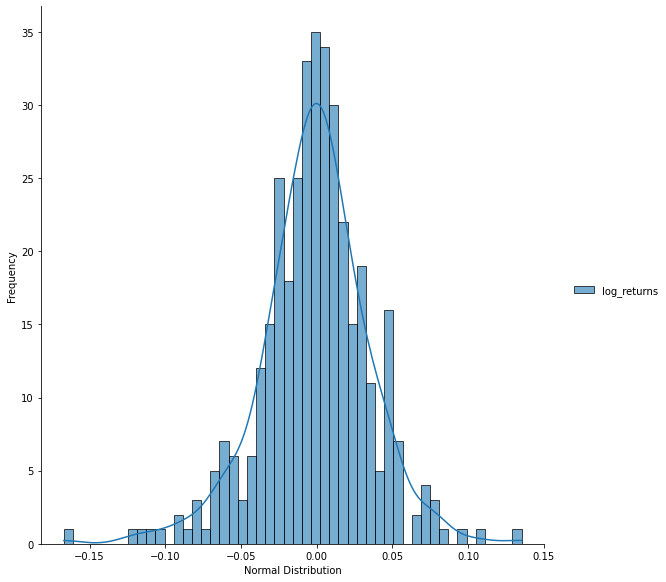

In [22]:
ax = sns.displot(
    sample_1d[['log_returns']],
    height    = 8,
    bins      = 50,
    kde       = True,
    # color     = 'red',
    alpha     = 0.6,
    linewidth = 0.7,
)

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

# Normality tests.